# Compare with Papers

In [6]:
# UiO-66
import os
import shutil
import argparse
import numpy as np
import pandas as pd
import torch

# https://pubs.acs.org/doi/full/10.1021/acs.inorgchem.8b00304
# H_ads = 22.5 kJ/mol (1 bar)
# Uptake and H_ads reported

# "Acc. Surface Area [m^2/g]","Void Fraction","PLD","LCD","Density","Channel Volume [A^3]"
Qm, b = 15.49, 0.17

params = [0.42321017, 0.83049091, 0.85526233, 0.90258542, 1.0704643,  1.95933196, 0.36200657, 0.93054579, 1.03665662, 1.78327444, 0.89450125, 2.49866305]
a1, a2, a3, a4, a5, a6 = params[0], params[1], params[2], params[3], params[4], params[5]
b1, b2, b3, b4, b5, b6 = params[6], params[7], params[8], params[9], params[10], params[11]

x_textural = [1224.07, 0.492274, 3.97353, 8.35883, 1.27955, 211.203]

P = 1        # bar
y_pred = (Qm * (b*P) / (1 + (b*P))) * 44.01
y_pred_plot = y_pred * (a1*np.log(x_textural)[0]**b1) * (a2*(x_textural[1])**b2) * (a3*np.log(x_textural)[2]**b3) * (a4*np.log(x_textural)[3]**b4) * (a5*(x_textural[4])**b5) * (a6*(x_textural[5])**b6) #* pressure
c1, c2, c3, c4 = 0.0018924590927757571, -0.13713333262577324, 1.9739830135250065, 20.835894376282834

print("Descriptor 1")
print(f"log(x) = {np.log(np.abs(y_pred_plot))}")
print(f"H_pred = {(c1 * np.log(np.abs(y_pred_plot))**3) + (c2 * np.log(np.abs(y_pred_plot))**2) + (c3 * np.log(np.abs(y_pred_plot))**1) + (c4 * np.log(np.abs(y_pred_plot))**0)}")

# Descriptor 2
params = [0.83333815 , 0.8127607 ,  1.00480477 , 7.47023166 , 1.6132114  , 1.47334513 ,2.29995854  ,1.11062069 , 1.36503532 , 0.70041387 ,-1.68974964 , 2.34003106]
a1, a2, a3, a4, a5, a6 = params[0], params[1], params[2], params[3], params[4], params[5]
b1, b2, b3, b4, b5, b6 = params[6], params[7], params[8], params[9], params[10], params[11]

y_text = (a1*np.log(x_textural)[0]**b1) * (a2*(x_textural[1])**b2) * (a3*np.log(x_textural)[2]**b3) * (a4*np.log(x_textural)[3]**b4) * (a5*(x_textural[4])**b5) * (a6*(x_textural[5])**b6)
y_pred_plot = (1/np.log(y_pred)) * np.log(y_text)
c1, c2, c3, c4 = 0.04055183461805808, -0.7033366970436667, 0.9406980778688125, 29.768097379762505

print("Descriptor 2")
print(f"log(x) = {y_pred_plot}")
print(f"H_pred = {(c1 * y_pred_plot**3) + (c2 * y_pred_plot**2) + (c3 * y_pred_plot**1) + (c4 * y_pred_plot**0)}")

Descriptor 1
log(x) = 19.35425665829417
H_pred = 21.392529499838428
Descriptor 2
log(x) = 4.1978863285189565
H_pred = 24.322536792874104


In [9]:
# IRMOF-1 / MOF-5
import os
import shutil
import argparse
import numpy as np
import pandas as pd
import torch

# https://pubs.acs.org/doi/full/10.1021/acs.inorgchem.8b00304
# H_ads = 22.5 kJ/mol (1 bar)
# Uptake and H_ads reported

# "Acc. Surface Area [m^2/g]","Void Fraction","PLD","LCD","Density","Channel Volume [A^3]"
x_textural = [3742.97, 0.81, 7.92287, 15.06472, 0.593338, 1917.68]
# x_textural = [2517, 0.81, 4, 15, 0.593338, 2236.92]

P = 1        # bar
y_pred = 3.2 * 44.01
H = 22.5    # kJ/mol

# Descriptor 1
params = [0.42321017, 0.83049091, 0.85526233, 0.90258542, 1.0704643,  1.95933196, 0.36200657, 0.93054579, 1.03665662, 1.78327444, 0.89450125, 2.49866305]
a1, a2, a3, a4, a5, a6 = params[0], params[1], params[2], params[3], params[4], params[5]
b1, b2, b3, b4, b5, b6 = params[6], params[7], params[8], params[9], params[10], params[11]

y_pred_plot = y_pred * (a1*np.log(x_textural)[0]**b1) * (a2*(x_textural[1])**b2) * (a3*np.log(x_textural)[2]**b3) * (a4*np.log(x_textural)[3]**b4) * (a5*(x_textural[4])**b5) * (a6*(x_textural[5])**b6) #* pressure
c1, c2, c3, c4 = 0.0018924590927757571, -0.13713333262577324, 1.9739830135250065, 20.835894376282834

print("Descriptor 1")
print(f"log(x) = {np.log(np.abs(y_pred_plot))}")
print(f"H_pred = {(c1 * np.log(np.abs(y_pred_plot))**3) + (c2 * np.log(np.abs(y_pred_plot))**2) + (c3 * np.log(np.abs(y_pred_plot))**1) + (c4 * np.log(np.abs(y_pred_plot))**0)}")

# Descriptor 2
params = [0.83333815 , 0.8127607 ,  1.00480477 , 7.47023166 , 1.6132114  , 1.47334513 ,2.29995854  ,1.11062069 , 1.36503532 , 0.70041387 ,-1.68974964 , 2.34003106]
a1, a2, a3, a4, a5, a6 = params[0], params[1], params[2], params[3], params[4], params[5]
b1, b2, b3, b4, b5, b6 = params[6], params[7], params[8], params[9], params[10], params[11]

y_text = (a1*np.log(x_textural)[0]**b1) * (a2*(x_textural[1])**b2) * (a3*np.log(x_textural)[2]**b3) * (a4*np.log(x_textural)[3]**b4) * (a5*(x_textural[4])**b5) * (a6*(x_textural[5])**b6)
y_pred_plot = (1/np.log(y_pred)) * np.log(y_text)
c1, c2, c3, c4 = 0.04055183461805808, -0.7033366970436667, 0.9406980778688125, 29.768097379762505

print("Descriptor 2")
print(f"log(x) = {y_pred_plot}")
print(f"H_pred = {(c1 * y_pred_plot**3) + (c2 * y_pred_plot**2) + (c3 * y_pred_plot**1) + (c4 * y_pred_plot**0)}")

Descriptor 1
log(x) = 25.90427091370249
H_pred = 12.84554605713878
Descriptor 2
log(x) = 5.531375693873823
H_pred = 20.315016401928332


In [13]:
# HKUST-1
import os
import shutil
import argparse
import numpy as np
import pandas as pd
import torch

# https://www.sciencedirect.com/science/article/pii/S1359431116314867
# H_ads = 22.5 kJ/mol (1 bar)
# Uptake and H_ads reported

# "Acc. Surface Area [m^2/g]","Void Fraction","PLD","LCD","Density","Channel Volume [A^3]"
x_textural = [2352.81, 0.68, 6.64519,  13.36950, 0.883693, 1370.57]
# x_textural = [2517, 0.81, 4, 15, 0.593338, 2236.92]

P = 1        # bar
y_pred = 3.7 * 44.01
H = 22.5    # kJ/mol

# Descriptor 1
params = [0.42321017, 0.83049091, 0.85526233, 0.90258542, 1.0704643,  1.95933196, 0.36200657, 0.93054579, 1.03665662, 1.78327444, 0.89450125, 2.49866305]
a1, a2, a3, a4, a5, a6 = params[0], params[1], params[2], params[3], params[4], params[5]
b1, b2, b3, b4, b5, b6 = params[6], params[7], params[8], params[9], params[10], params[11]

y_pred_plot = y_pred * (a1*np.log(x_textural)[0]**b1) * (a2*(x_textural[1])**b2) * (a3*np.log(x_textural)[2]**b3) * (a4*np.log(x_textural)[3]**b4) * (a5*(x_textural[4])**b5) * (a6*(x_textural[5])**b6) #* pressure
c1, c2, c3, c4 = 0.0018924590927757571, -0.13713333262577324, 1.9739830135250065, 20.835894376282834

print("Descriptor 1")
print(f"log(x) = {np.log(np.abs(y_pred_plot))}")
print(f"H_pred = {(c1 * np.log(np.abs(y_pred_plot))**3) + (c2 * np.log(np.abs(y_pred_plot))**2) + (c3 * np.log(np.abs(y_pred_plot))**1) + (c4 * np.log(np.abs(y_pred_plot))**0)}")

# Descriptor 2
params = [0.83333815 , 0.8127607 ,  1.00480477 , 7.47023166 , 1.6132114  , 1.47334513 ,2.29995854  ,1.11062069 , 1.36503532 , 0.70041387 ,-1.68974964 , 2.34003106]
a1, a2, a3, a4, a5, a6 = params[0], params[1], params[2], params[3], params[4], params[5]
b1, b2, b3, b4, b5, b6 = params[6], params[7], params[8], params[9], params[10], params[11]

y_text = (a1*np.log(x_textural)[0]**b1) * (a2*(x_textural[1])**b2) * (a3*np.log(x_textural)[2]**b3) * (a4*np.log(x_textural)[3]**b4) * (a5*(x_textural[4])**b5) * (a6*(x_textural[5])**b6)
y_pred_plot = (1/np.log(y_pred)) * np.log(y_text)
c1, c2, c3, c4 = 0.04055183461805808, -0.7033366970436667, 0.9406980778688125, 29.768097379762505

print("Descriptor 2")
print(f"log(x) = {y_pred_plot}")
print(f"H_pred = {(c1 * y_pred_plot**3) + (c2 * y_pred_plot**2) + (c3 * y_pred_plot**1) + (c4 * y_pred_plot**0)}")

Descriptor 1
log(x) = 25.210364522369943
H_pred = 13.766346047107245
Descriptor 2
log(x) = 4.992812432520082
H_pred = 21.9790760345671


In [16]:
# MIL-101 (Cr)
import os
import shutil
import argparse
import numpy as np
import pandas as pd
import torch

# https://www.sciencedirect.com/science/article/pii/S1359431116314867
# H_ads = 25 kJ/mol (1 bar)
# Uptake and H_ads reported

# "Acc. Surface Area [m^2/g]","Void Fraction","PLD","LCD","Density","Channel Volume [A^3]"
x_textural = [3181.77, 0.56242, 13.85716,  30.96940, 0.439743, 98685.2]
# x_textural = [2517, 0.81, 4, 15, 0.593338, 2236.92]

P = 1        # bar
y_pred = 2.2 * 44.01
H = 18    # kJ/mol

# Descriptor 1
params = [0.42321017, 0.83049091, 0.85526233, 0.90258542, 1.0704643,  1.95933196, 0.36200657, 0.93054579, 1.03665662, 1.78327444, 0.89450125, 2.49866305]
a1, a2, a3, a4, a5, a6 = params[0], params[1], params[2], params[3], params[4], params[5]
b1, b2, b3, b4, b5, b6 = params[6], params[7], params[8], params[9], params[10], params[11]

y_pred_plot = y_pred * (a1*np.log(x_textural)[0]**b1) * (a2*(x_textural[1])**b2) * (a3*np.log(x_textural)[2]**b3) * (a4*np.log(x_textural)[3]**b4) * (a5*(x_textural[4])**b5) * (a6*(x_textural[5])**b6) #* pressure
c1, c2, c3, c4 = 0.0018924590927757571, -0.13713333262577324, 1.9739830135250065, 20.835894376282834

print("Descriptor 1")
print(f"log(x) = {np.log(np.abs(y_pred_plot))}")
print(f"H_pred = {(c1 * np.log(np.abs(y_pred_plot))**3) + (c2 * np.log(np.abs(y_pred_plot))**2) + (c3 * np.log(np.abs(y_pred_plot))**1) + (c4 * np.log(np.abs(y_pred_plot))**0)}")

# Descriptor 2
params = [0.83333815 , 0.8127607 ,  1.00480477 , 7.47023166 , 1.6132114  , 1.47334513 ,2.29995854  ,1.11062069 , 1.36503532 , 0.70041387 ,-1.68974964 , 2.34003106]
a1, a2, a3, a4, a5, a6 = params[0], params[1], params[2], params[3], params[4], params[5]
b1, b2, b3, b4, b5, b6 = params[6], params[7], params[8], params[9], params[10], params[11]

y_text = (a1*np.log(x_textural)[0]**b1) * (a2*(x_textural[1])**b2) * (a3*np.log(x_textural)[2]**b3) * (a4*np.log(x_textural)[3]**b4) * (a5*(x_textural[4])**b5) * (a6*(x_textural[5])**b6)
y_pred_plot = (1/np.log(y_pred)) * np.log(y_text)
c1, c2, c3, c4 = 0.04055183461805808, -0.7033366970436667, 0.9406980778688125, 29.768097379762505

print("Descriptor 2")
print(f"log(x) = {y_pred_plot}")
print(f"H_pred = {(c1 * y_pred_plot**3) + (c2 * y_pred_plot**2) + (c3 * y_pred_plot**1) + (c4 * y_pred_plot**0)}")

Descriptor 1
log(x) = 35.63338422135531
H_pred = 2.676610101270409
Descriptor 2
log(x) = 8.173884013923832
H_pred = 12.611687599429295


# Compare with CORE Database (Subset)

Descriptor 1
0-10%: 29.19254658385093
10-25%: 34.47204968944099
Descriptor 1
0-10%: 29.803646563814866
10-25%: 29.94389901823282
Descriptor 1
0-10%: 41.03107344632768
10-25%: 40.25423728813559
Descriptor 1
0-10%: 56.16883116883117
10-25%: 40.0974025974026
Descriptor 2
0-10%: 64.59627329192547
10-25%: 33.22981366459627
Descriptor 2
0-10%: 47.615708274894814
10-25%: 39.90182328190743
Descriptor 2
0-10%: 45.55084745762712
10-25%: 42.58474576271186
Descriptor 2
0-10%: 56.33116883116883
10-25%: 41.23376623376623


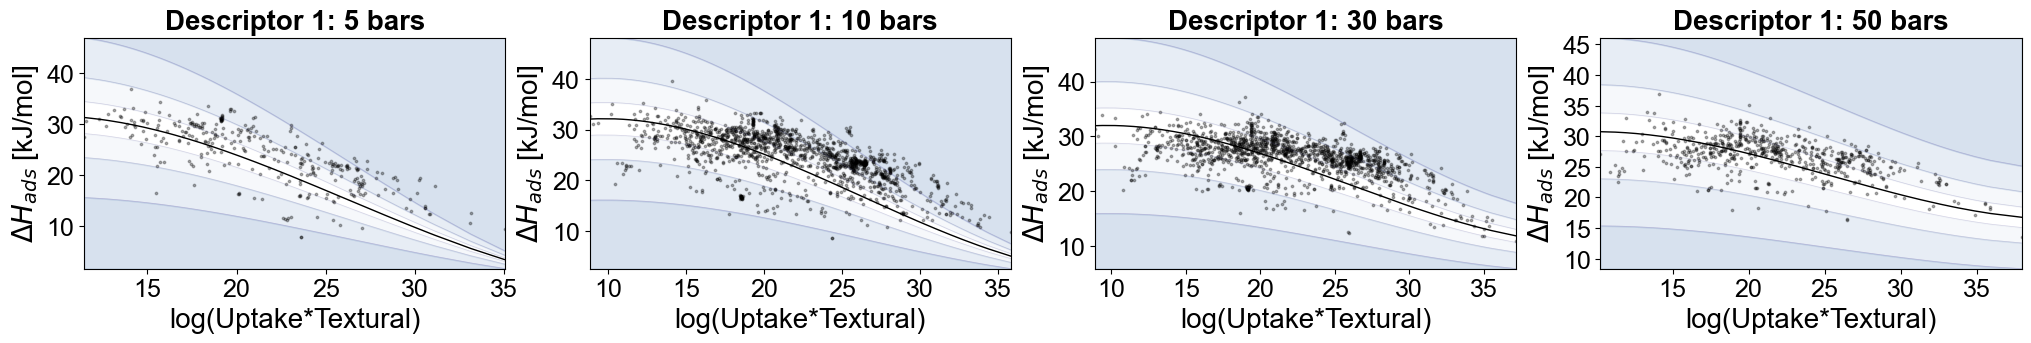

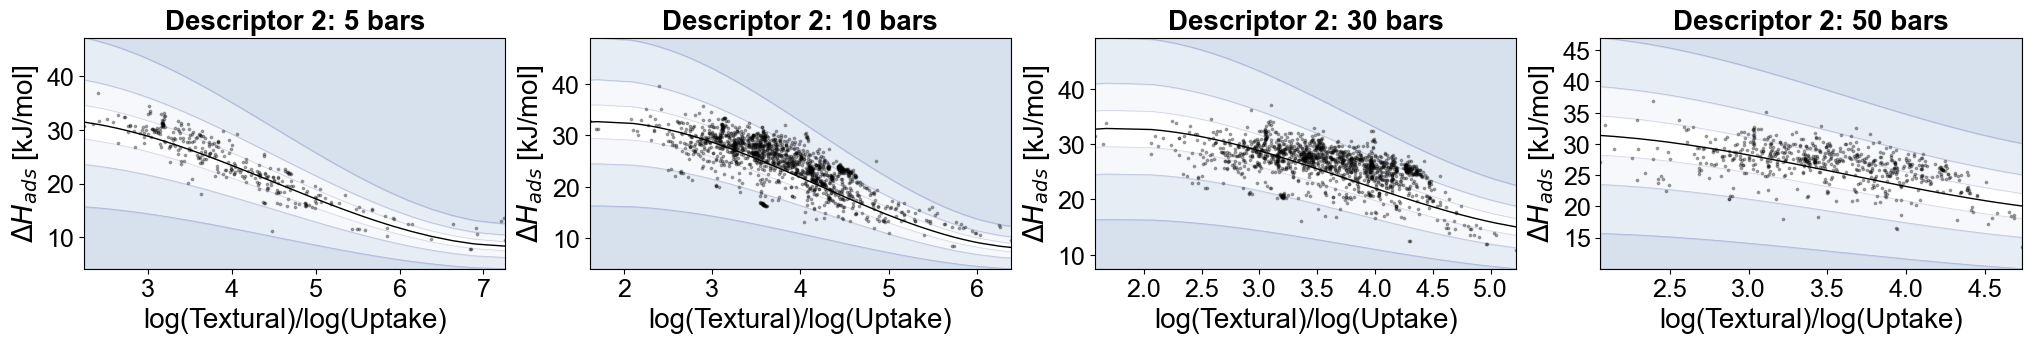

In [37]:
import os
import shutil
import argparse
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

data_textural = pd.read_excel("E:/CO2 Adsorption/Data/Generative/core/texturalProperties_core.xlsx")
data_q = pd.read_excel("E:/CO2 Adsorption/Data/Generative/core/core_output_isotherm.xlsx")
data_H = pd.read_excel("E:/CO2 Adsorption/Data/Generative/core/core_output_enthalpy.xlsx")

font = {"family" : "Arial", "weight" : "medium", "size"   : 20, "style"  : "normal"}
font_tick = {"family" : "Arial", "weight" : "medium", "size"   : 18, "style"  : "normal"}
font_title = {"family" : "Arial", "weight" : "semibold", "size"   : 20, "style"  : "normal"}

pressure_full = [0.5, 5, 10, 30, 50]

# Descriptor 1
plt.figure(figsize=(25, 3))
for j in range(2, data_q.shape[1]):
    x_tot, y_tot, y_actual_tot = [], [], []
    plt.subplot(1, 4, j-1)
    for i in range(data_q.shape[0]):
        x_textural = [data_textural.iloc[i, 1], data_textural.iloc[i, 2], data_textural.iloc[i, 3], data_textural.iloc[i, 4], data_textural.iloc[i, 5], data_textural.iloc[i, 6]]

        params = [0.42321017, 0.83049091, 0.85526233, 0.90258542, 1.0704643,  1.95933196, 0.36200657, 0.93054579, 1.03665662, 1.78327444, 0.89450125, 2.49866305]
        a1, a2, a3, a4, a5, a6 = params[0], params[1], params[2], params[3], params[4], params[5]
        b1, b2, b3, b4, b5, b6 = params[6], params[7], params[8], params[9], params[10], params[11]

        c = [[0.001899, -0.1345, 1.8762, 20.7178], [0.001738, -0.1369, 2.1253, 22.2966], [0.001706, -0.1343, 2.1291, 22.5792], 
                          [0.001252, -0.0975, 1.5391, 25.1093], [0.000980, -0.0745, 1.1909, 25.3081]]

        if isinstance(data_q.iloc[i, j], float) and isinstance(data_H.iloc[i, j], float):
            y_pred = data_q.iloc[i, j]
            y_pred_plot = y_pred * (a1*np.log(x_textural)[0]**b1) * (a2*(x_textural[1])**b2) * (a3*np.log(x_textural)[2]**b3) * (a4*np.log(x_textural)[3]**b4) * (a5*(x_textural[4])**b5) * (a6*(x_textural[5])**b6) #* pressure

            c1, c2, c3, c4 = c[j-1][0], c[j-1][1], c[j-1][2], c[j-1][3]

            x = np.log(np.abs(y_pred_plot))
            y = (c1 * np.log(np.abs(y_pred_plot))**3) + (c2 * np.log(np.abs(y_pred_plot))**2) + (c3 * np.log(np.abs(y_pred_plot))**1) + (c4 * np.log(np.abs(y_pred_plot))**0)

            x_tot += [x]
            y_tot += [y]
            y_actual_tot += [data_H.iloc[i, j]]
            
    x_tot, y_tot, y_actual_tot = np.array(x_tot), np.array(y_tot), np.array(y_actual_tot) 
    x_tot, y_tot, y_actual_tot = x_tot[~np.isnan(x_tot)], y_tot[~np.isnan(y_tot)], y_actual_tot[~np.isnan(y_actual_tot)]
    x, y, ys = zip(*sorted(zip(x_tot, y_tot, y_actual_tot)))

    plt.plot(x, y - (0.1 * np.array(y)), color="darkslateblue", linewidth=0.5, alpha=0.2)
    plt.plot(x, y + (0.1 * np.array(y)), color="darkslateblue", linewidth=0.5, alpha=0.2)
    plt.plot(x, y - (0.25 * np.array(y)), color="darkslateblue", linewidth=0.5, alpha=0.2)
    plt.plot(x, y + (0.25 * np.array(y)), color="darkslateblue", linewidth=0.5, alpha=0.2)
    plt.plot(x, y - (0.5 * np.array(y)), color="rebeccapurple", linewidth=0.5, alpha=0.2)
    plt.plot(x, y + (0.5 * np.array(y)), color="rebeccapurple", linewidth=0.5, alpha=0.2)
        
    plt.fill_between(x, y - (0.1 * np.array(y)), y - (0.25 * np.array(y)), color="lightsteelblue", alpha=0.1)
    plt.fill_between(x, y - (0.25 * np.array(y)), y - (0.5 * np.array(y)), color="lightsteelblue", alpha=0.3)
    plt.fill_between(x, y - (0.5 * np.array(y)), min(y - (0.5 * np.array(y))), color="lightsteelblue", alpha=0.5)
    
    plt.fill_between(x, y + (0.1 * np.array(y)), y + (0.25 * np.array(y)), color="lightsteelblue", alpha=0.1)
    plt.fill_between(x, y + (0.25 * np.array(y)), y + (0.5 * np.array(y)), color="lightsteelblue", alpha=0.3)
    plt.fill_between(x, y + (0.5 * np.array(y)), max(y + (0.5 * np.array(y))), color="lightsteelblue", alpha=0.5)

    plt.plot(x, y, color="black", linewidth=1)
    plt.scatter(x, ys, s=3, color="black", alpha=0.3)
    
    plt.xlim([min(x), max(x)])
    plt.ylim([min(y - (0.5 * np.array(y))), max(y + (0.5 * np.array(y)))])
    
    plt.xlabel("log(Uptake*Textural)", **font)
    plt.ylabel("$\Delta H_{ads}$ [kJ/mol]", **font)
    plt.title(f"Descriptor 1: {pressure_full[j-1]} bars", **font_title)
    plt.xticks(**font_tick)
    plt.yticks(**font_tick)
    
    print("Descriptor 1")
    
    print(f"0-10%: {100 * sum([int(b) for b in [(y[i] - (0.1 * np.array(y[i])) < ys[i] < y[i] - (0 * np.array(y[i]))) or (y[i] + (0 * np.array(y[i])) < ys[i] < y[i] + (0.1 * np.array(y[i]))) for i in range(len(ys))]]) / len(ys)}")
    print(f"10-25%: {100 * sum([int(b) for b in [(y[i] - (0.25 * np.array(y[i])) < ys[i] < y[i] - (0.1 * np.array(y[i]))) or (y[i] + (0.1 * np.array(y[i])) < ys[i] < y[i] + (0.25 * np.array(y[i]))) for i in range(len(ys))]]) / len(ys)}")
    
plt.savefig("E:/CO2 Adsorption/core_validation1.svg", bbox_inches="tight")
       
# Descriptor 2
plt.figure(figsize=(25, 3))
for j in range(2, data_q.shape[1]):
    x_tot, y_tot, y_actual_tot = [], [], []
    plt.subplot(1, 4, j-1)
    for i in range(data_q.shape[0]):
        # "Acc. Surface Area [m^2/g]","Void Fraction","PLD","LCD","Density","Channel Volume [A^3]"
        x_textural = [data_textural.iloc[i, 1], data_textural.iloc[i, 2], data_textural.iloc[i, 3], data_textural.iloc[i, 4], data_textural.iloc[i, 5], data_textural.iloc[i, 6]]

        params = [0.83333815 , 0.8127607 ,  1.00480477 , 7.47023166 , 1.6132114  , 1.47334513 ,2.29995854  ,1.11062069 , 1.36503532 , 0.70041387 ,-1.68974964 , 2.34003106]
        a1, a2, a3, a4, a5, a6 = params[0], params[1], params[2], params[3], params[4], params[5]
        b1, b2, b3, b4, b5, b6 = params[6], params[7], params[8], params[9], params[10], params[11]

        c = [[0.131043, -0.2559, -0.6250, 31.0647], [0.260844, -3.5264, 9.6153, 24.6302], [0.422810, -5.3231, 14.7746, 20.8556], 
                      [0.587175, -6.6999, 18.4029, 18.0208], [0.5017592, -5.4304, 14.4098, 20.3145]]
        
        if isinstance(data_q.iloc[i, j], float) and isinstance(data_H.iloc[i, j], float):
            y_pred = data_q.iloc[i, j]
            y_text = (a1*np.log(x_textural)[0]**b1) * (a2*(x_textural[1])**b2) * (a3*np.log(x_textural)[2]**b3) * (a4*np.log(x_textural)[3]**b4) * (a5*(x_textural[4])**b5) * (a6*(x_textural[5])**b6)
            y_pred_plot = (1/np.log(y_pred)) * np.log(y_text)

            c1, c2, c3, c4 = c[j-1][0], c[j-1][1], c[j-1][2], c[j-1][3]

            x = y_pred_plot
            y = (c1 * y_pred_plot**3) + (c2 * y_pred_plot**2) + (c3 * y_pred_plot**1) + (c4 * y_pred_plot**0)
            
            x_tot += [x]
            y_tot += [y]
            y_actual_tot += [data_H.iloc[i, j]]

    x_tot, y_tot, y_actual_tot = np.array(x_tot), np.array(y_tot), np.array(y_actual_tot) 
    x_tot, y_tot, y_actual_tot = x_tot[~np.isnan(x_tot)], y_tot[~np.isnan(y_tot)], y_actual_tot[~np.isnan(y_actual_tot)]
    x, y, ys = zip(*sorted(zip(x_tot, y_tot, y_actual_tot)))

    plt.plot(x, y - (0.1 * np.array(y)), color="darkslateblue", linewidth=0.5, alpha=0.2)
    plt.plot(x, y + (0.1 * np.array(y)), color="darkslateblue", linewidth=0.5, alpha=0.2)
    plt.plot(x, y - (0.25 *np.array(y)), color="darkslateblue", linewidth=0.5, alpha=0.2)
    plt.plot(x, y + (0.25 *np.array(y)), color="darkslateblue", linewidth=0.5, alpha=0.2)
    plt.plot(x, y - (0.5 * np.array(y)), color="rebeccapurple", linewidth=0.5, alpha=0.2)
    plt.plot(x, y + (0.5 * np.array(y)), color="rebeccapurple", linewidth=0.5, alpha=0.2)
    
    plt.fill_between(x, y - (0.1 * np.array(y)), y - (0.25 * np.array(y)), color="lightsteelblue", alpha=0.1)
    plt.fill_between(x, y - (0.25 * np.array(y)), y - (0.5 * np.array(y)), color="lightsteelblue", alpha=0.3)
    plt.fill_between(x, y - (0.5 * np.array(y)), min(y - (0.5 * np.array(y))), color="lightsteelblue", alpha=0.5)
    
    plt.fill_between(x, y + (0.1 * np.array(y)), y + (0.25 * np.array(y)), color="lightsteelblue", alpha=0.1)
    plt.fill_between(x, y + (0.25 * np.array(y)), y + (0.5 * np.array(y)), color="lightsteelblue", alpha=0.3) 
    plt.fill_between(x, y + (0.5 * np.array(y)), max(y + (0.5 * np.array(y))), color="lightsteelblue", alpha=0.5)
    
    plt.plot(x, y, color="black", linewidth=1)
    plt.scatter(x, ys, s=3, color="black", alpha=0.3)
    
    plt.xlim([min(x), max(x)])
    plt.ylim([min(y - (0.5 * np.array(y))), max(y + (0.5 * np.array(y)))])

    plt.xlabel("log(Textural)/log(Uptake)", **font)
    plt.ylabel("$\Delta H_{ads}$ [kJ/mol]", **font)
    plt.title(f"Descriptor 2: {pressure_full[j-1]} bars", **font_title)
    plt.xticks(**font_tick)
    plt.yticks(**font_tick)
    
    print("Descriptor 2")
        
    print(f"0-10%: {100 * sum([int(b) for b in [(y[i] - (0.1 * np.array(y[i])) < ys[i] < y[i] - (0 * np.array(y[i]))) or (y[i] + (0 * np.array(y[i])) < ys[i] < y[i] + (0.1 * np.array(y[i]))) for i in range(len(ys))]]) / len(ys)}")
    print(f"10-25%: {100 * sum([int(b) for b in [(y[i] - (0.25 * np.array(y[i])) < ys[i] < y[i] - (0.1 * np.array(y[i]))) or (y[i] + (0.1 * np.array(y[i])) < ys[i] < y[i] + (0.25 * np.array(y[i]))) for i in range(len(ys))]]) / len(ys)}")
    
plt.savefig("E:/CO2 Adsorption/core_validation2.svg", bbox_inches="tight")


Descriptor 1
23.108177874245545
Descriptor 1
26.79418042866779
Descriptor 1
16.575443030557604
Descriptor 1
9.5668274703386
Descriptor 2
5.646878516753245
Descriptor 2
11.398566722147283
Descriptor 2
12.917455171029776
Descriptor 2
8.706602454614954


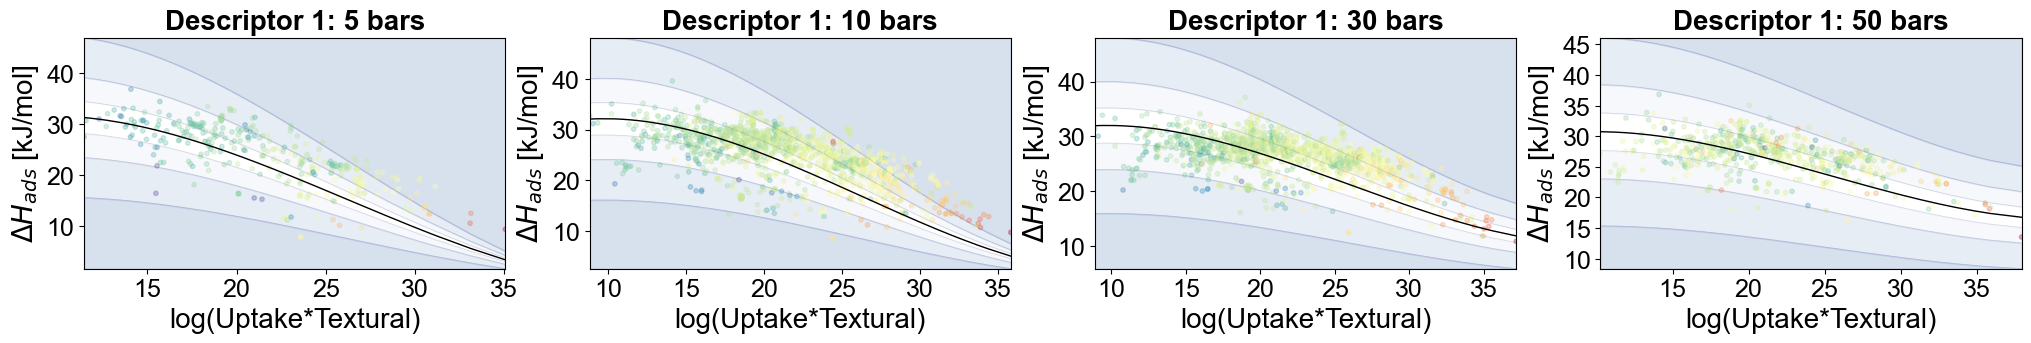

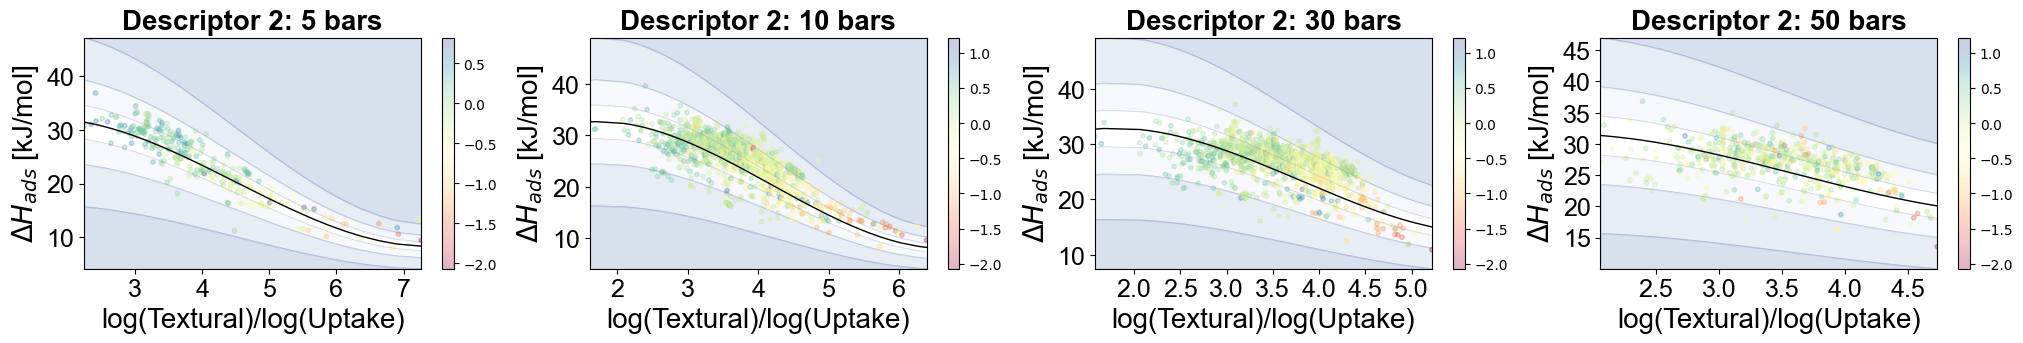

In [7]:
import os
import shutil
import argparse
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

data_textural = pd.read_excel("E:/CO2 Adsorption/Data/Generative/core/texturalProperties_core.xlsx")
data_q = pd.read_excel("E:/CO2 Adsorption/Data/Generative/core/core_output_isotherm.xlsx")
data_H = pd.read_excel("E:/CO2 Adsorption/Data/Generative/core/core_output_enthalpy.xlsx")

font = {"family" : "Arial", "weight" : "medium", "size"   : 20, "style"  : "normal"}
font_tick = {"family" : "Arial", "weight" : "medium", "size"   : 18, "style"  : "normal"}
font_title = {"family" : "Arial", "weight" : "semibold", "size"   : 20, "style"  : "normal"}

pressure_full = [0.5, 5, 10, 30, 50]

# Descriptor 1
plt.figure(figsize=(25, 3))
for j in range(2, data_q.shape[1]):
    x_tot, y_tot, y_actual_tot, x_textural_tot = [], [], [], []
    plt.subplot(1, 4, j-1)
    for i in range(data_q.shape[0]):
        x_textural = [data_textural.iloc[i, 1], data_textural.iloc[i, 2], data_textural.iloc[i, 3], data_textural.iloc[i, 4], data_textural.iloc[i, 5], data_textural.iloc[i, 6]]

        params = [0.42321017, 0.83049091, 0.85526233, 0.90258542, 1.0704643,  1.95933196, 0.36200657, 0.93054579, 1.03665662, 1.78327444, 0.89450125, 2.49866305]
        a1, a2, a3, a4, a5, a6 = params[0], params[1], params[2], params[3], params[4], params[5]
        b1, b2, b3, b4, b5, b6 = params[6], params[7], params[8], params[9], params[10], params[11]

        c = [[0.001899, -0.1345, 1.8762, 20.7178], [0.001738, -0.1369, 2.1253, 22.2966], [0.001706, -0.1343, 2.1291, 22.5792], 
                          [0.001252, -0.0975, 1.5391, 25.1093], [0.000980, -0.0745, 1.1909, 25.3081]]

        if isinstance(data_q.iloc[i, j], float) and isinstance(data_H.iloc[i, j], float):
            y_pred = data_q.iloc[i, j]
            y_pred_plot = y_pred * (a1*np.log(x_textural)[0]**b1) * (a2*(x_textural[1])**b2) * (a3*np.log(x_textural)[2]**b3) * (a4*np.log(x_textural)[3]**b4) * (a5*(x_textural[4])**b5) * (a6*(x_textural[5])**b6) #* pressure

            c1, c2, c3, c4 = c[j-1][0], c[j-1][1], c[j-1][2], c[j-1][3]

            x = np.log(np.abs(y_pred_plot))
            y = (c1 * np.log(np.abs(y_pred_plot))**3) + (c2 * np.log(np.abs(y_pred_plot))**2) + (c3 * np.log(np.abs(y_pred_plot))**1) + (c4 * np.log(np.abs(y_pred_plot))**0)

            x_tot += [x]
            y_tot += [y]
            y_actual_tot += [data_H.iloc[i, j]]
            x_textural_tot += [data_textural.iloc[i, 5]]
            
    x_tot, y_tot, y_actual_tot, x_textural_tot = np.array(x_tot), np.array(y_tot), np.array(y_actual_tot), np.array(x_textural_tot) 
    x_tot, y_tot, y_actual_tot, x_textural_tot = x_tot[~np.isnan(x_tot)], y_tot[~np.isnan(y_tot)], y_actual_tot[~np.isnan(y_actual_tot)], x_textural_tot[~np.isnan(x_textural_tot)]
    x, y, ys, tex = zip(*sorted(zip(x_tot, y_tot, y_actual_tot, x_textural_tot)))

    plt.plot(x, y - (0.1 * np.array(y)), color="darkslateblue", linewidth=0.5, alpha=0.2)
    plt.plot(x, y + (0.1 * np.array(y)), color="darkslateblue", linewidth=0.5, alpha=0.2)
    plt.plot(x, y - (0.25 * np.array(y)), color="darkslateblue", linewidth=0.5, alpha=0.2)
    plt.plot(x, y + (0.25 * np.array(y)), color="darkslateblue", linewidth=0.5, alpha=0.2)
    plt.plot(x, y - (0.5 * np.array(y)), color="rebeccapurple", linewidth=0.5, alpha=0.2)
    plt.plot(x, y + (0.5 * np.array(y)), color="rebeccapurple", linewidth=0.5, alpha=0.2)
        
    plt.fill_between(x, y - (0.1 * np.array(y)), y - (0.25 * np.array(y)), color="lightsteelblue", alpha=0.1)
    plt.fill_between(x, y - (0.25 * np.array(y)), y - (0.5 * np.array(y)), color="lightsteelblue", alpha=0.3)
    plt.fill_between(x, y - (0.5 * np.array(y)), min(y - (0.5 * np.array(y))), color="lightsteelblue", alpha=0.5)
    
    plt.fill_between(x, y + (0.1 * np.array(y)), y + (0.25 * np.array(y)), color="lightsteelblue", alpha=0.1)
    plt.fill_between(x, y + (0.25 * np.array(y)), y + (0.5 * np.array(y)), color="lightsteelblue", alpha=0.3)
    plt.fill_between(x, y + (0.5 * np.array(y)), max(y + (0.5 * np.array(y))), color="lightsteelblue", alpha=0.5)

    plt.plot(x, y, color="black", linewidth=1)
    plt.scatter(x, ys, c=np.log(tex), s=10, cmap="Spectral", alpha=0.3)
    
    plt.xlim([min(x), max(x)])
    plt.ylim([min(y - (0.5 * np.array(y))), max(y + (0.5 * np.array(y)))])
    
    plt.xlabel("log(Uptake*Textural)", **font)
    plt.ylabel("$\Delta H_{ads}$ [kJ/mol]", **font)
    plt.title(f"Descriptor 1: {pressure_full[j-1]} bars", **font_title)
    plt.xticks(**font_tick)
    plt.yticks(**font_tick)
    
    print("Descriptor 1")
    mse = np.mean((np.array(y) - np.array(ys)) ** 2)
    print(mse)
    
plt.savefig("E:/CO2 Adsorption/core_validation1.svg", bbox_inches="tight")
       
# Descriptor 2
plt.figure(figsize=(25, 3))
for j in range(2, data_q.shape[1]):
    x_tot, y_tot, y_actual_tot, x_textural_tot = [], [], [], []
    plt.subplot(1, 4, j-1)
    for i in range(data_q.shape[0]):
        # "Acc. Surface Area [m^2/g]","Void Fraction","PLD","LCD","Density","Channel Volume [A^3]"
        x_textural = [data_textural.iloc[i, 1], data_textural.iloc[i, 2], data_textural.iloc[i, 3], data_textural.iloc[i, 4], data_textural.iloc[i, 5], data_textural.iloc[i, 6]]

        params = [0.83333815 , 0.8127607 ,  1.00480477 , 7.47023166 , 1.6132114  , 1.47334513 ,2.29995854  ,1.11062069 , 1.36503532 , 0.70041387 ,-1.68974964 , 2.34003106]
        a1, a2, a3, a4, a5, a6 = params[0], params[1], params[2], params[3], params[4], params[5]
        b1, b2, b3, b4, b5, b6 = params[6], params[7], params[8], params[9], params[10], params[11]

        c = [[0.131043, -0.2559, -0.6250, 31.0647], [0.260844, -3.5264, 9.6153, 24.6302], [0.422810, -5.3231, 14.7746, 20.8556], 
                      [0.587175, -6.6999, 18.4029, 18.0208], [0.5017592, -5.4304, 14.4098, 20.3145]]
        
        if isinstance(data_q.iloc[i, j], float) and isinstance(data_H.iloc[i, j], float):
            y_pred = data_q.iloc[i, j]
            y_text = (a1*np.log(x_textural)[0]**b1) * (a2*(x_textural[1])**b2) * (a3*np.log(x_textural)[2]**b3) * (a4*np.log(x_textural)[3]**b4) * (a5*(x_textural[4])**b5) * (a6*(x_textural[5])**b6)
            y_pred_plot = (1/np.log(y_pred)) * np.log(y_text)

            c1, c2, c3, c4 = c[j-1][0], c[j-1][1], c[j-1][2], c[j-1][3]

            x = y_pred_plot
            y = (c1 * y_pred_plot**3) + (c2 * y_pred_plot**2) + (c3 * y_pred_plot**1) + (c4 * y_pred_plot**0)
            
            x_tot += [x]
            y_tot += [y]
            y_actual_tot += [data_H.iloc[i, j]]
            x_textural_tot += [data_textural.iloc[i, 5]]

    x_tot, y_tot, y_actual_tot, x_textural_tot = np.array(x_tot), np.array(y_tot), np.array(y_actual_tot), np.array(x_textural_tot) 
    x_tot, y_tot, y_actual_tot, x_textural_tot = x_tot[~np.isnan(x_tot)], y_tot[~np.isnan(y_tot)], y_actual_tot[~np.isnan(y_actual_tot)], x_textural_tot[~np.isnan(x_textural_tot)]
    x, y, ys, tex = zip(*sorted(zip(x_tot, y_tot, y_actual_tot, x_textural_tot)))

    plt.plot(x, y - (0.1 * np.array(y)), color="darkslateblue", linewidth=0.5, alpha=0.2)
    plt.plot(x, y + (0.1 * np.array(y)), color="darkslateblue", linewidth=0.5, alpha=0.2)
    plt.plot(x, y - (0.25 *np.array(y)), color="darkslateblue", linewidth=0.5, alpha=0.2)
    plt.plot(x, y + (0.25 *np.array(y)), color="darkslateblue", linewidth=0.5, alpha=0.2)
    plt.plot(x, y - (0.5 * np.array(y)), color="rebeccapurple", linewidth=0.5, alpha=0.2)
    plt.plot(x, y + (0.5 * np.array(y)), color="rebeccapurple", linewidth=0.5, alpha=0.2)
    
    plt.fill_between(x, y - (0.1 * np.array(y)), y - (0.25 * np.array(y)), color="lightsteelblue", alpha=0.1)
    plt.fill_between(x, y - (0.25 * np.array(y)), y - (0.5 * np.array(y)), color="lightsteelblue", alpha=0.3)
    plt.fill_between(x, y - (0.5 * np.array(y)), min(y - (0.5 * np.array(y))), color="lightsteelblue", alpha=0.5)
    
    plt.fill_between(x, y + (0.1 * np.array(y)), y + (0.25 * np.array(y)), color="lightsteelblue", alpha=0.1)
    plt.fill_between(x, y + (0.25 * np.array(y)), y + (0.5 * np.array(y)), color="lightsteelblue", alpha=0.3) 
    plt.fill_between(x, y + (0.5 * np.array(y)), max(y + (0.5 * np.array(y))), color="lightsteelblue", alpha=0.5)
    
    plt.plot(x, y, color="black", linewidth=1)
    plt.scatter(x, ys, c=np.log(tex), s=10, cmap="Spectral", alpha=0.3)
    
    plt.xlim([min(x), max(x)])
    plt.ylim([min(y - (0.5 * np.array(y))), max(y + (0.5 * np.array(y)))])

    plt.xlabel("log(Textural)/log(Uptake)", **font)
    plt.ylabel("$\Delta H_{ads}$ [kJ/mol]", **font)
    plt.title(f"Descriptor 2: {pressure_full[j-1]} bars", **font_title)
    plt.xticks(**font_tick)
    plt.yticks(**font_tick)
    plt.colorbar()
    
    print("Descriptor 2")
    mse = np.mean((np.array(y) - np.array(ys)) ** 2)
    print(mse)
    
plt.savefig("E:/CO2 Adsorption/core_validation2.svg", bbox_inches="tight")
